In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Croatia'

link = 'https://rally-base.com/2023/croatia-rally-2023/?ssId='
startat, no_ss=7447, int(20) # starting number of url, count of Special Stages

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,17,Ogier S.,RC1,00:11:57.7,96.31 0.00,00:00:00.0 00:00:00.0,1,Croatia,1
2,2,11,Neuville,RC1,00:12:00.3,95.96 0.14,00:00:02.6 00:00:02.6,1,Croatia,2
3,3,8,Tänak Ott,RC1,00:12:08.2,94.92 0.55,00:00:10.5 00:00:07.9,1,Croatia,3
4,4,69,Rovanperä,RC1,00:12:09.0,94.81 0.59,00:00:11.3 00:00:00.8,1,Croatia,4
5,5,33,Evans Elf,RC1,00:12:10.0,94.68 0.64,00:00:12.3 00:00:01.0,1,Croatia,5
...,...,...,...,...,...,...,...,...,...,...
44,44,71,Mandić Ig,RC5,00:11:16.8,74.95 13.51,00:03:10.4 00:00:28.1,20,Croatia,44
45,45,67,Lončarić,RC4,00:11:37.1,72.76 14.95,00:03:30.7 00:00:20.3,20,Croatia,45
46,46,70,Šekuljica,RC5,00:11:41.2,72.34 15.24,00:03:34.8 00:00:04.1,20,Croatia,46
47,47,68,Čičko V.,RC5,00:11:51.7,71.27 15.99,00:03:45.3 00:00:10.5,20,Croatia,47


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                            Pos.                                              \
ss                             1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                       
4   Lappi  Esa RC1   Croatia    6   3   6   5   6   1   7   6   7   8   6   4   
7   Loubet  P. RC1   Croatia    8   6   7   8   7   9   8   8   6   7   7   7   
8   Tänak  Ott RC1   Croatia    3   4   4   2   3   6   1   3   2   3   4   5   
11  Neuville   RC1   Croatia    2   1   2   4   5   4   2   5   4   4  50  50   
17  Ogier  S.  RC1   Croatia    1  17   1   1   1   3   4   7   3   2   2   1   
18  Katsuta  T RC1   Croatia    7   5   5   7   8  11   6   4   8   6   5   6   
20  Solberg  O RC2   Croatia   12  11  16  12  13  14  14  12  16  16  21  12   
21  Rossel  Yo RC2   Croatia    9   7  12  16  10   7  15  16  11  13  13   9   
22  Lindholm   RC2   Croatia   10  24  10   9  12  13  12  10  10  14  12  10   
23  Greensmith RC2   Croatia   11  41  11  11   9  16  10  12  14  10   9  38   
24  Gryazin  N RC2   Croatia   13  12   9  10  11  10  11   9  13   9  10  11   
25  Fourmaux   RC2   Croatia   14  27  15  14  14  15  16  17   9  11  11  14   
26  Pajari  Sa RC2   Croatia   16  10  14  15  17  17  13  14  15  15  16  13   
27  Cais  Erik RC2   Croatia   52  51  51  51  49  47  47  47  17  17  14  15   
28  Munster  G RC2   Croatia   20  14  17  29  18  47  47  47  20  20  15  17   
29  Linnamäe   RC2   Croatia   17  13  19  17  49  47  47  47  18  18  17  16   
30  Ciamin  Ni RC2   Croatia   15   8  13  13  15  12   9  11  11  12   8   8   
32  Kremer  Ar RC2   Croatia   19  16  22  22  20  18  18  20  19  22  20  18   
33  Evans  Elf RC1   Croatia    5   2   3   3   2   2   3   1   5   5   3   3   
34  Miele  Mau RC2   Croatia   26  22  21  21  23  21  22  22  26  21  19  19   
35  Keferböck  RC2   Croatia   25  21  26  25  24  24  25  25  23  26  26  21   
36  Cachon  A. RC2   Croatia   18   9  18  18  16   8  17  15  52  52  51  51   
37  Herczig  N RC2   Croatia   22  15  20  19  21  41  21  21  22  19  23  20   
38  O'Brien  P RC2   Croatia   23  23  28  24  30  31  26  32  24  25  22  22   
39  Vossen  He RC2   Croatia   47  46  49  48  46  43  44  43  48  49  46  46   
40  Boland  Ea RC2   Croatia   39  34  41  40  36  46  34  33  40  42  42  36   
41  Creighton  RC3   Croatia   24  18  23  22  19  19  19  18  53  53  52  52   
44  Pellier  L RC3   Croatia   21  20  24  20  22  20  20  19  21  32  18  24   
45  Dominguez  RC3   Croatia   27  28  33  28  27  25  27  24  27  33  28  31   
46  Hernández  RC3   Croatia   32  31  32  33  25  23  29  27  33  45  52  52   
47  Blach  Rob RC3   Croatia   28  25  31  27  51  50  50  50  29  31  24  26   
48  Rensonnet  RC3   Croatia   29  32  27  30  31  29  24  23  28  24  27  27   
49  Anwar  Ham RC3   Croatia   51  47  47  47  44  40  42  34  46  47  40  45   
50  Kelly  Eam RC3   Croatia   31  33  29  31  28  27  23  26  30  29  32  28   
51  Kohn  Fili RC3   Croatia   53  52  52  52  51  50  50  50  36  27  30  29   
52  Ravenščak  RC3   Croatia   38  52  52  52  51  50  50  50  35  30  33  34   
53  Majerčák   RC2   Croatia   37  30  30  32  32  28  31  29  34  28  35  30   
54  Turk  Rok  RC2   Croatia   30  19  25  26  26  22  28  31  25  23  25  23   
55  László  Z. RC2   Croatia   40  36  42  42  38  32  38  37  43  38  38  37   
56  Zrinski  A RC2   Croatia   43  43  37  38  37  35  33  35  42  36  43  40   
57  Cartier  V RC2   Croatia   34  26  34  34  29  26  30  28  32  34  31  25   
58  Schwarz  F RC3   Croatia   33  35  35  35  33  30  32  30  31  35  29  33   
59  Fontana  M RC4   Croatia   35  38  44  44  35  53  53  53  37  41  36  39   
60  Oldani  Ma RC4   Croatia   41  40  39  41  41  33  35  39  38  39  34  32   
61  Jürgenson  RC4   Croatia   43  42  40  36  39  36  36  38  39  40  37  41   
62  Medved  Ja RC4   Croatia   36  37  38  37  34  33  37  36  54  54  54  54   
64  Hrvatin  T RC4   Croatia   

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3660 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,17,Ogier S.,RC1,1,Croatia,1,717.7
2,11,Neuville,RC1,1,Croatia,2,720.3
3,8,Tänak Ott,RC1,1,Croatia,3,728.2
4,69,Rovanperä,RC1,1,Croatia,4,729.0
5,33,Evans Elf,RC1,1,Croatia,5,730.0
...,...,...,...,...,...,...,...
44,71,Mandić Ig,RC5,20,Croatia,44,676.8
45,67,Lončarić,RC4,20,Croatia,45,697.1
46,70,Šekuljica,RC5,20,Croatia,46,701.2
47,68,Čičko V.,RC5,20,Croatia,47,711.7


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Croatia 1      717.7
        2      918.1
        3      330.8
        4      288.2
        5      726.8
        6      933.3
        7      329.1
        8      296.3
        9      763.6
        10     270.3
        11     347.9
        12     502.9
        13     775.0
        14     272.2
        15     350.6
        16     508.0
        17     416.5
        18     488.2
        19     422.5
        20     486.4

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7
...,...,...,...,...,...,...,...,...
1060,71,Mandić Ig,RC5,20,Croatia,44,676.8,486.4
1061,67,Lončarić,RC4,20,Croatia,45,697.1,486.4
1062,70,Šekuljica,RC5,20,Croatia,46,701.2,486.4
1063,68,Čičko V.,RC5,20,Croatia,47,711.7,486.4


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,0.0,0.000000,01
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,2.6,0.362268,01
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,10.5,1.463007,01
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,11.3,1.574474,01
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,12.3,1.713808,01
...,...,...,...,...,...,...,...,...,...,...,...
1060,71,Mandić Ig,RC5,20,Croatia,44,676.8,486.4,190.4,39.144737,20
1061,67,Lončarić,RC4,20,Croatia,45,697.1,486.4,210.7,43.318257,20
1062,70,Šekuljica,RC5,20,Croatia,46,701.2,486.4,214.8,44.161184,20
1063,68,Čičko V.,RC5,20,Croatia,47,711.7,486.4,225.3,46.319901,20


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,0.0,0.000000,01
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,2.6,0.362268,01
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,10.5,1.463007,01
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,11.3,1.574474,01
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,12.3,1.713808,01
...,...,...,...,...,...,...,...,...,...,...,...
1020,18,Katsuta T,RC1,20,Croatia,4,493.7,486.4,7.3,1.500822,20
1021,4,Lappi Esa,RC1,20,Croatia,5,495.0,486.4,8.6,1.768092,20
1022,8,Tänak Ott,RC1,20,Croatia,6,498.0,486.4,11.6,2.384868,20
1023,33,Evans Elf,RC1,20,Croatia,7,499.1,486.4,12.7,2.611020,20


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,0.0,0.000000,01
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,2.6,0.362268,01
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,10.5,1.463007,01
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,11.3,1.574474,01
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,12.3,1.713808,01
...,...,...,...,...,...,...,...,...,...,...,...
1020,18,Katsuta T,RC1,20,Croatia,4,493.7,486.4,7.3,1.500822,20
1021,4,Lappi Esa,RC1,20,Croatia,5,495.0,486.4,8.6,1.768092,20
1022,8,Tänak Ott,RC1,20,Croatia,6,498.0,486.4,11.6,2.384868,20
1023,33,Evans Elf,RC1,20,Croatia,7,499.1,486.4,12.7,2.611020,20


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Croatia                                                            \
SS.             01     02   03   04    05    06   07    08    09   10     11   
Crew                                                                           
Evans  Elf    12.3    4.2  3.3  1.8   4.8   0.7  0.7   0.0   7.2  2.8    8.6   
Katsuta  T    29.2   17.1  4.5  5.2  24.5  47.8  3.5   2.4  17.4  4.5   13.9   
Lappi  Esa    23.0    5.6  7.3  4.5   7.9   0.0  3.7   3.5  12.8  5.9   15.0   
Loubet  P.    30.3   17.8  7.7  5.5  13.0  42.0  8.6  10.1   9.4  5.1   17.2   
Neuville       2.6    0.0  0.8  2.1   7.2   6.4  0.3   2.7   2.4  2.5  600.0   
Ogier  S.      0.0   92.6  0.0  0.0   0.0   1.9  2.0   9.3   1.4  0.1    2.5   
Rovanperä     11.3  137.4  8.1  4.6   5.8  12.3  2.0   0.9   0.0  0.0    0.0   
Tänak  Ott    10.5   12.1  3.8  1.3   5.8  17.0  0.0   1.6   1.2  0.6   11.6   

Race                                                                   
SS.            12     13     14     15     16    17    18    19    20  
Crew                                                                   
Evans  Elf    5.1    7.1    3.4    7.1    5.8   4.8  12.8   4.7  12.7  
Katsuta  T   11.0   11.9    4.8   12.3   10.8   5.8  13.9   4.6   7.3  
Lappi  Esa    7.1   16.6    3.7    9.8    3.9  11.4  12.7   5.5   8.6  
Loubet  P.   11.7    6.1    5.3   22.7   14.5  41.2  22.7  37.4  44.2  
Neuville    600.0  600.0  600.0  600.0  600.0   7.2   0.0  15.6   0.0  
Ogier  S.     0.0    0.0    2.1    2.4    0.0   3.7   5.4   0.1   4.4  
Rovanperä     0.7    1.6    0.9    0.0    0.7   0.0   0.9   0.0   1.0  
Tänak  Ott    8.6    0.4    0.0   11.4   14.4   9.9  11.5   3.6  11.6

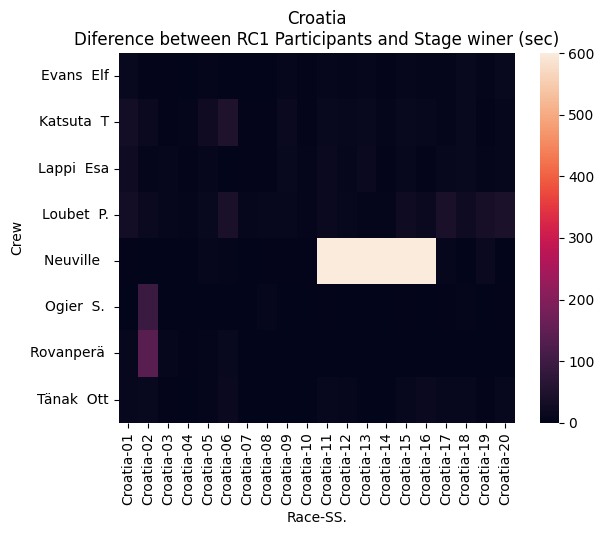

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

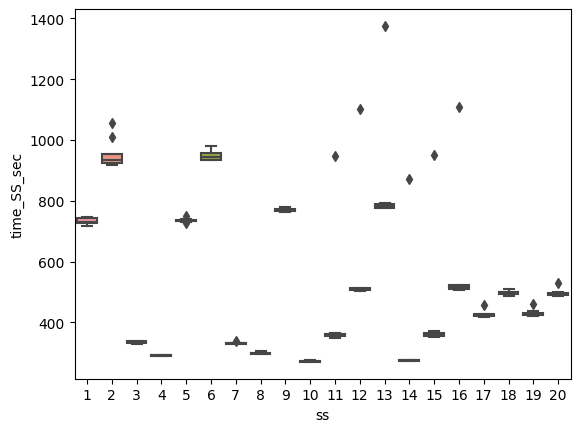

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

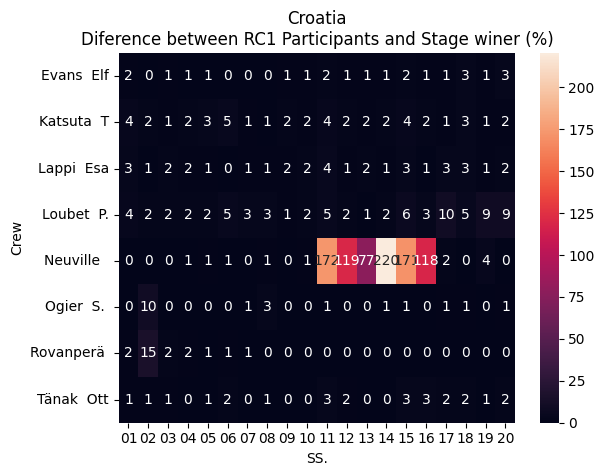

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")